#  MILESTONE 1. PROBLEMA DE KEPLER.
## 1a) Método de Euler. Con funciones.
### *Teoría.*

Partiendo de la expresión: $\ddot{\vec{r}}(t) M_{2} = -\,\frac{G\ M_1 M_2}{r^3}\,\vec{r}(t)$, se puede llegar a la expresión adimensional:



**$$\ddot{\vec{r}} = - \frac{\vec{r}}{r^3}$$**

Cuyas condiciones iniciales son:

$$ \vec{r} (0) = (1, 0)$$

$$ \dot{\vec{r}} (0) = (0, 1)$$


Para resolverlo será necesario pasar del anterior sistema de 2º orden a otro de 1er orden tal que así:

$$\frac{dU}{dt} = F(U, t)$$

$$U(0) $$

En el que U es:

$$ U =
\begin{pmatrix}

\vec{r} \\

\dot{\vec{r}}

\end{pmatrix} = 

\begin{pmatrix}

x \\

y \\

\dot{x} \\

\dot{y}

\end{pmatrix} 





$$


Si derivamos U:

$$ \frac{d}{dt}
\begin{pmatrix}

\vec{r} \\

\dot{\vec{r}}

\end{pmatrix} = 

\begin{pmatrix}

\dot{\vec{r}} \\

\ddot{\vec{r}}

\end{pmatrix} = 

\begin{pmatrix}

\dot{\vec{r}} \\

-\frac{\vec{r}}{r^3}

\end{pmatrix},

$$

En la que la última matriz es F(U), no siendo en este caso función del tiempo

Integrándolo con un esquema Euler, se obtiene:

$$

U^{n+1} = U^n + \Delta t \ F^n  
  \\ con \  n = 0, ..., N-1



$$

### *Implementación*

In [395]:
import numpy as np

def F(U):
        
            r = U[0:2]
            rd= U[2:4]

            return np.concatenate([rd, -r/np.linalg.norm(r)**3])


# U = np.array([1, 4, 1 ,7])  Esta línea era simplemente para realizar una prueba

#print(F(U))


In [396]:
T = 100
N = 1000

Delta_t = T/N

U0 = np.array([1, 0, 0, 1])

U_solucion = np.zeros((N+1, 4))

U_solucion[0,:] = U0

#print(U_solucion)

for n in range(N):

 U_solucion[n+1, :] = U_solucion[n, :]  + Delta_t*F(U_solucion[n, :])


print(U_solucion)




[[ 1.          0.          0.          1.        ]
 [ 1.          0.1        -0.1         1.        ]
 [ 0.99        0.2        -0.19851853  0.99014815]
 ...
 [-2.71834967  1.96877737 -0.49419161 -0.36383188]
 [-2.76776883  1.93239418 -0.48700243 -0.36903868]
 [-2.81646907  1.89549031 -0.47980668 -0.37406259]]


### *Graficar la trayectoria. Euler*

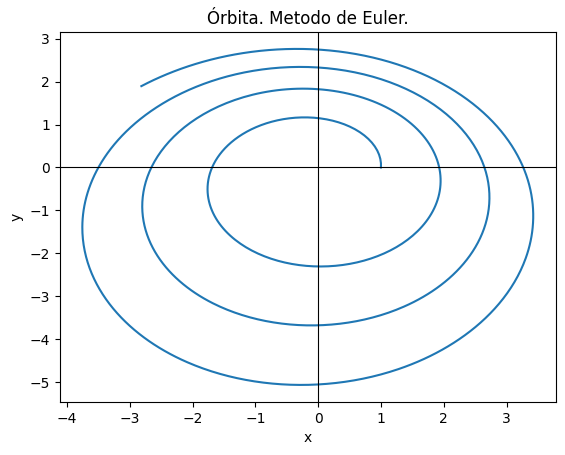

In [397]:
import matplotlib.pyplot as plt

# Puntos x e y:

x_euler = U_solucion[:, 0]
y_euler = U_solucion[:, 1]


#Ponemos plt.axis('equal) o plt.axhline/ plt.axhvline para que los ejes tengan la misma escala y haya unos ejes en x=0 e y=0

plt.plot(x_euler, y_euler)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Órbita. Metodo de Euler.")
plt.axhline(0, color='black', linewidth=0.8)  # eje x en y=0
plt.axvline(0, color='black', linewidth=0.8)  # eje y en x=0




## 1b) Método de Euler. Sin funciones.

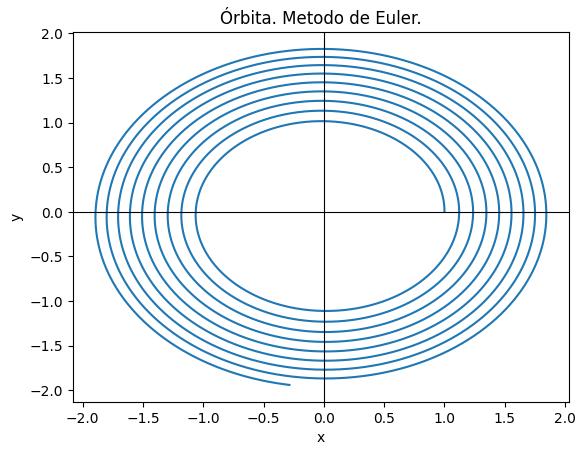

In [398]:
import numpy as np

T= 100
N = 10000

Delta_t = T/N

U0 = np.array([1, 0, 0, 1])

U_solucion = np.zeros((N+1, 4))

U_solucion[0,:] = U0


# Bucle 

for n in range(N):
    
   rx, ry, vx, vy = U_solucion[n, :]

   r = np.sqrt(rx**2 + ry**2)

   U_solucion[n+1, 0] = rx + Delta_t * vx
   U_solucion[n+1, 1] = ry + Delta_t * vy
   U_solucion[n+1, 2] = vx + Delta_t * (-rx/ r**3)
   U_solucion[n+1, 3] = vy + Delta_t * (-ry/ r**3)




import matplotlib.pyplot as plt

# Puntos x e y:

valores_x = U_solucion[:, 0]
valores_y = U_solucion[:, 1]


#Ponemos plt.axis('equal) o plt.axhline/ plt.axhvline para que los ejes tengan la misma escala y haya unos ejes en x=0 e y=0

plt.plot(valores_x, valores_y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Órbita. Metodo de Euler.")
plt.axhline(0, color='black', linewidth=0.8)  # eje x en y=0
plt.axvline(0, color='black', linewidth=0.8)  # eje y en x=0
#plt.axis('equal')



## 2) Método de Crank-Nicolson. Sin funciones


### Teoría

El método de Crank-Nicholson es **implícito**, lo que significa que para cada paso hay que resolver una ecuación para obtener el valor de $U_{n+1}$. El esquema es el siguiente:

$$

U_{n+1} = U_n + \frac{\Delta t}{2} (F(U_n) + F(U_{n+1}))


$$

In [399]:
import numpy as np

T = 100
N = 1000

Delta_t = T/N

U0 = np.array([1, 0, 0, 1])

U = np.zeros((N+1, 4))

U[0,:] = U0

maxiter = 100
tol = 1e-10

# Vamos a resolverlo iterativamente, usando como valor inicial los valores iniciales

for n in range(N):

     rx, ry, vx, vy = U[n, :]

     r_n = np.sqrt(rx**2 + ry**2)

     F_n = np.array([vx, vy, -rx/r_n**3, -ry/r_n**3])

 
     U_inicial= U[n,:]

     for k in range(maxiter):
          
          xk, yk, vxk, vyk = U_inicial
          rk = np.sqrt(xk**2+yk**2)

          F_siguiente = np.array([vxk, vyk, -xk/rk**3, -yk/rk**3])


          # valor de U
          U_nueva = U[n,:] + (Delta_t/2)*(F_n + F_siguiente)

    
          if np.linalg.norm(U_nueva - U_inicial)<tol:
               break

          U_inicial=U_nueva

     U[n+1,:] = U_nueva



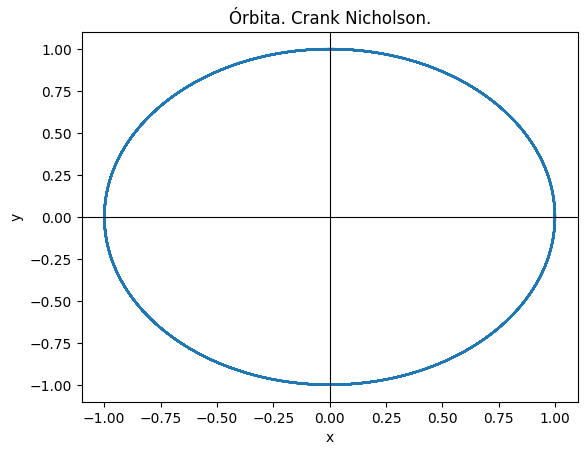

In [400]:
import matplotlib.pyplot as plt

# extraer posiciones para graficar
valores_x_CN = U[:, 0]
valores_y_CN = U[:, 1]

plt.plot(valores_x_CN, valores_y_CN)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Órbita. Crank Nicholson.")
plt.axhline(0, color='black', linewidth=0.8)  # eje x en y=0
plt.axvline(0, color='black', linewidth=0.8)  # eje y en x=0
#plt.axis('equal')



## 3) Método de Runge-Kutta de 4º orden.

### *Teoría*

El método de Runge - Kutta de 4º orden es **explícito**, esto quiere decir que se puede conocer su estado utilizando los valores que tenía en instantes anteriores. De esta forma, se puede obtener el estado $U_{n+1}$:


$$

k_1 = F(U_n) \\

k_2 = F(U_n + \frac{\Delta t}{2}k_1)\\

k_3 = F(U_n + \frac{\Delta t}{2}k_2)\\

k_4 = F(U_n + \Delta t \ k_3)\\

U_{n+1} = U_n + \frac{\Delta t}{6} (k_1 + 2k_2 + 2k_3 + k_4)


$$

### *Implementación*

In [401]:
import numpy as np    

def F(U):
        
            r = U[0:2]
            rd= U[2:4]

            return np.concatenate([rd, -r/np.linalg.norm(r)**3])


#print(F(U))

In [402]:
T = 100
N = 1000

Delta_t = T/N

U0 = np.array([1, 0, 0, 1])

U_solucion = np.zeros((N+1, 4))

U_solucion[0,:] = U0

#print(U_solucion)

for n in range(N):
 
 k1 = F(U_solucion[n, :])
 k2 = F(U_solucion[n, :] + (Delta_t/2)*k1)
 k3 = F(U_solucion[n, :] + (Delta_t/2)*k2)
 k4 = F(U_solucion[n, :] + Delta_t*k3)

 U_solucion[n+1, :] = U_solucion[n, :]  + (Delta_t/6)*(k1 + 2*k2 + 2*k3 + k4)

 #F(U_solucion[n, :])


#print(U_solucion)



### *Graficar Runge Kutta 4º orden*

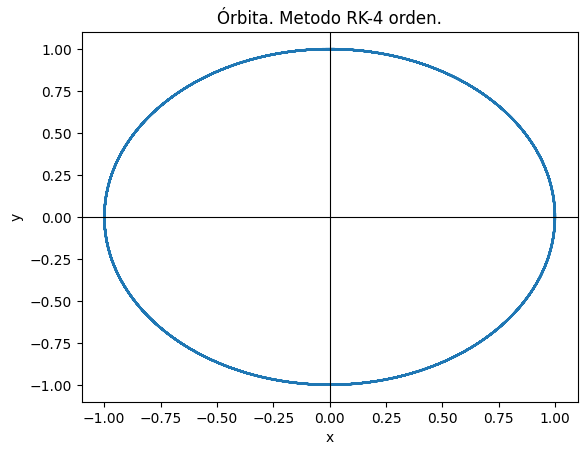

In [403]:
import matplotlib.pyplot as plt

# Puntos x e y:

#print(U_solucion)

x_rk4 = U_solucion[:, 0]
y_rk4 = U_solucion[:, 1]


#Ponemos plt.axis('equal) o plt.axhline/ plt.axhvline para que los ejes tengan la misma escala y haya unos ejes en x=0 e y=0

plt.plot(x_rk4, y_rk4)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Órbita. Metodo RK-4 orden.")
plt.axhline(0, color='black', linewidth=0.8)  # eje x en y=0
plt.axvline(0, color='black', linewidth=0.8)  # eje y en x=0

### *Comparativa Euler vs Runge-Kutta 4 orden vs Crank-Nicolson*

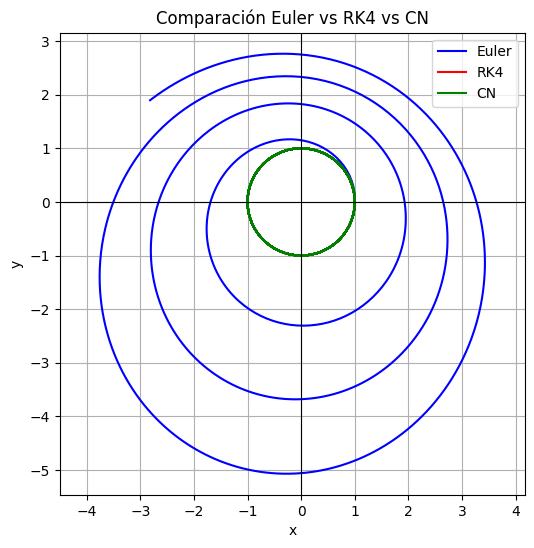

In [404]:
plt.figure(figsize=(6,6))
plt.plot(x_euler, y_euler, 'b-', label="Euler")
plt.plot(x_rk4, y_rk4, 'r-', label="RK4")
plt.plot(valores_x_CN, valores_y_CN, 'g-', label ="CN")
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparación Euler vs RK4 vs CN")
plt.legend()
plt.grid(True)
plt.show()
